In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# DATA CLEANING STEP

In [2]:
data=pd.read_csv('/Users/chohan/Desktop/ML_DL_ Hackathon/ML_REALTIME PROJECT(A_TO_Z)(real_estate price Prediction)/Bengaluru_House_Data.csv')

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
data.shape

(13320, 9)

In [8]:
data.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
data1=data.drop(["area_type","availability","society","balcony"],axis="columns")

In [10]:
data1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
data1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
data2=data1.dropna()

In [13]:
data2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
data2["bhk"]=data2["size"].apply(lambda x: int(x.split(" ")[0]))

C:\Users\chohan\anaconda3\envs\usama_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
data2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
data3=data2.drop(["size"],axis="columns")

In [17]:
data3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [18]:
data3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [19]:
data3[data3.bhk>20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [20]:
data3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
data3[~data3["total_sqft"].apply(isfloat)].head()

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2


In [23]:
def Convert_sqft_to_num(x):
    token=x.split("-")
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [24]:
data4=data3.copy()

In [25]:
data4["total_sqft"]=data4["total_sqft"].apply(Convert_sqft_to_num)
data4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


# DATA FEATURING STEP

In [26]:
data4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [27]:
data5=data4.copy()

In [28]:
data5["price_prsqft"]=data5["price"]*100000/data5["total_sqft"]

In [29]:
data5.head()

,location,total_sqft,bath,price,bhk,price_prsqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [30]:
data5.location=data5.location.apply(lambda x:x.strip())
location_stats=data5.groupby("location")["location"].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [31]:
len(location_stats[location_stats<=10])

1052

In [32]:
location_stats_lessthan10=location_stats[location_stats<=10]
location_stats_lessthan10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [33]:
len(location_stats_lessthan10)

1052

In [34]:
len(data5.location.unique())

1293

In [35]:
data5.location=data5.location.apply(lambda x:"other" if x in location_stats_lessthan10 else x)
len(data5.location.unique())

242

In [36]:
data5.head()

,location,total_sqft,bath,price,bhk,price_prsqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


# Outlier Removal Step

In [37]:
data6=data5[~(data5.total_sqft/data5.bhk<300)]
data6.shape

(12502, 6)

In [38]:
data6.describe()

,total_sqft,bath,price,bhk,price_prsqft
count,12456.000000,12502.000000,12502.000000,12502.000000,12456.000000
mean,1590.189927,2.564790,111.311915,2.650696,6308.502826
std,1260.404795,1.084946,152.089966,0.981698,4168.127339
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1115.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [39]:
def remove_pps_outlier(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m=np.mean(subdf.price_prsqft)
        st=np.std(subdf.price_prsqft)
        reduce_df=subdf[(subdf.price_prsqft>(m-st))& (subdf.price_prsqft<=(m+st))]
        df_out=pd.concat([df_out,reduce_df],ignore_index=True)
    return df_out
data7=remove_pps_outlier(data6)
data7.shape

(10241, 6)

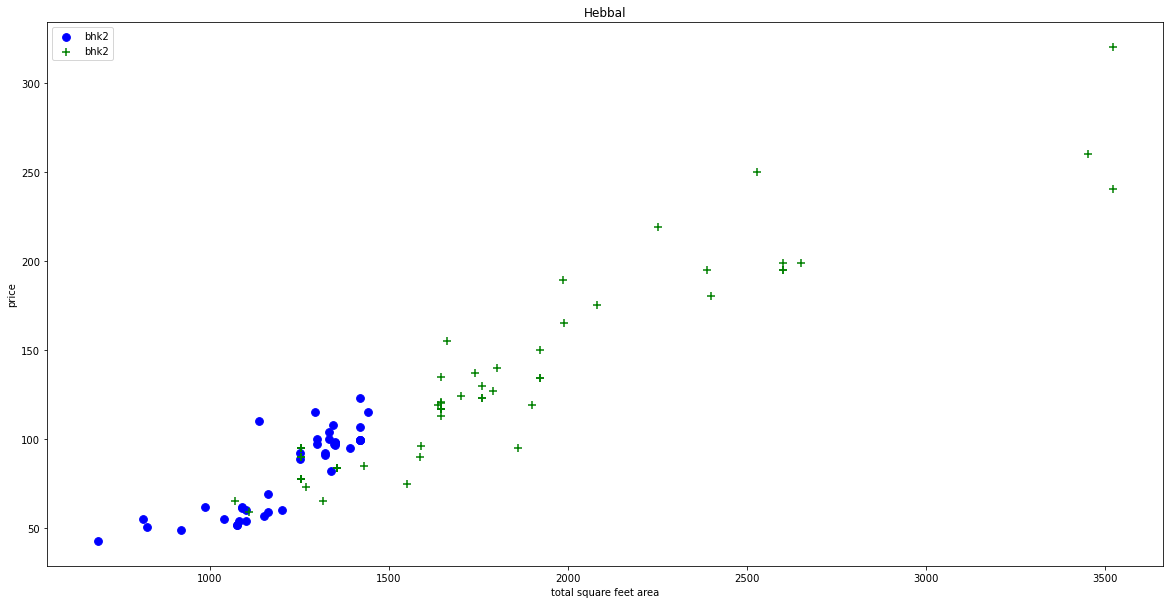

In [46]:
def plot_scatterPlot(df,location):
    plt.figure(figsize=(20,10))
    bhk2=df[(df.location==location)& (df.bhk==2)]
    bhk3=df[(df.location==location)& (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue",label="bhk2",s=60)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker="+",color="green",label="bhk2",s=60)
    plt.xlabel("total square feet area")
    plt.ylabel("price")
    plt.title(location)
    plt.legend()
plot_scatterPlot(data7,"Hebbal")    

In [55]:
def remove_bhk_outlier(df):
    exclude_indice=np.array([])
    for location,location_df in df.groupby("location"):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk]={
                "mean":np.mean(bhk_df.price_prsqft),
                "std":np.std(bhk_df.price_prsqft),
                "count":bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                exclude_indice=np.append(exclude_indice,bhk_df[bhk_df.price_prsqft<(stats['mean'])].index.values)
    
    return df.drop(exclude_indice,axis='index')    
        

In [56]:
data8=remove_bhk_outlier(data7)

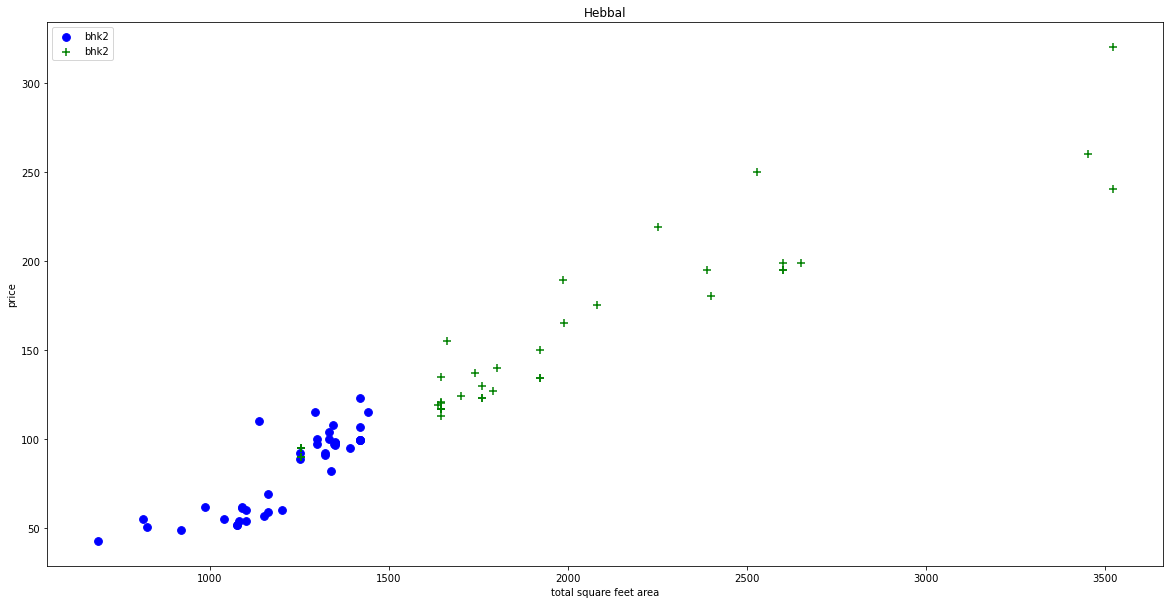

In [58]:
plot_scatterPlot(data8,"Hebbal")

Text(0, 0.5, 'count')

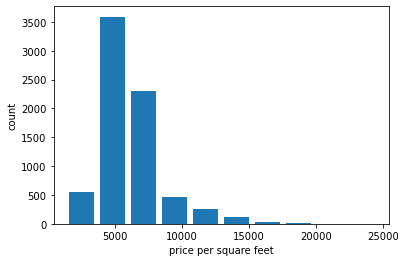

In [59]:
plt.hist(data8.price_prsqft,rwidth=0.8)
plt.xlabel("price per square feet")
plt.ylabel("count")

Text(0, 0.5, 'count')

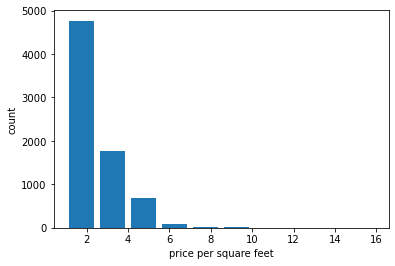

In [60]:
plt.hist(data8.bath,rwidth=0.8)
plt.xlabel("price per square feet")
plt.ylabel("count")

In [61]:
data8[data8.bath>data8.bhk+2]


,location,total_sqft,bath,price,bhk,price_prsqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8411,other,11338.0,9.0,1000.0,6,8819.897689


In [62]:
data9=data8[data8.bath<data8.bhk+2]
data9.shape

(7251, 6)

In [66]:
data10=data8.drop(["price_prsqft"],axis="columns")

(13320, 9)

In [67]:
data10.shape

(7329, 5)

# Model Building Step

In [68]:
dummies=pd.get_dummies(data10.location)

In [69]:
data11=pd.concat([data10,dummies.drop("other",axis="columns")],axis="columns")
data11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
data12=data11.drop("location",axis="columns")
data12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
data12.shape

(7329, 245)

In [72]:
x=data12.drop("price",axis="columns")
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
y=data12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [75]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8909987705740239

In [77]:
from sklearn.model_selection import ShuffleSplit,cross_val_score,GridSearchCV
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.81924325, 0.86698523, 0.86457433, 0.8857566 , 0.86309462])

In [89]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_usinggridsearchcv(X,y):
    algo={
        "linear_model":{
            "model":LinearRegression(),
            "params":{
                "normalize":[True,False]
            }
            
        },
        "lasso":{
            "model":Lasso(),
            "params":{
                "alpha":[1,2],
                "selection":["random","cyclic"]
            }
        },
        "descisiontree":{
            "model":DecisionTreeRegressor(),
            "params":{
                "criterion":["mse","friedman_mse"],
                "splitter":["best","random"]
            }
        }
    }
    score=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algo.items():
        gs=GridSearchCV(config["model"],config["params"],cv=cv,return_train_score=False)
        gs.fit(X,y)
        score.append({"model":algo_name,"best_score":gs.best_score_,"best_params":gs.best_params_})
    return pd.DataFrame(score,columns=["model","best_score","best_params"])   

In [90]:
find_best_model_usinggridsearchcv(x_train,y_train)

,model,best_score,best_params
0,linear_model,0.859334,{'normalize': False}
1,lasso,0.718392,"{'alpha': 1, 'selection': 'random'}"
2,descisiontree,0.750517,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [100]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    X=np.zeros(len(x.columns))
    X[0]=sqft
    X[1]=bath
    X[2]=bhk
    if loc_index >=0:
        X[loc_index]=1
    return lr_clf.predict([X])[0]

In [115]:
import pickle
with open("banglore_home_price.pickle","wb")as f:
    pickle.dump(lr_clf,f)

In [117]:
import json
columns={"data_columns":[col.lower() for col in x.columns]}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))